# Playground

For trying out features.

In [1]:
import cify as ci
from cify.si.pso.algorithm import PSO

component: None
None


In [13]:
import cify as ci
from cify.si.pso.algorithm import PSO

# 1. Set seed
ci.set_seed(1234)

# 2. Create objective function
def sphere(vector):
    return sum([float(x)**2 for x in vector])

obj_func = ci.ObjectiveFunction(sphere, 
                                ci.Optimization.Max, 
                                n_dimensions=25, 
                                bounds=[-10, 10]
)

# 3. Create metaheuristic
class customPSO(PSO):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def do_iteration(self):
        for swarm in self.swarms:
            for particle in swarm:
                particle.position = (particle.position + particle.p_best_position) / 2
        return super().do_iteration()

swarm = ci.get_swarm(50, obj_func=obj_func)
swarm.velocity_update = ci.velocity_updates.deterministic_iw_vel_update

pso = customPSO(obj_func=obj_func, 
                swarms=[swarm,
                        ci.get_swarm(35, obj_func=obj_func),
                        ci.get_swarm(50, obj_func=obj_func)
                        ],
                velocity_update=ci.velocity_updates.constriction_coefficient_vel_update,
                velocity_params={'k': 0.9, 'c1': 1.345}
)

# Perform 100 iterations and examine the final one.
pso.execute(100)
pso.statistics.tail(1)

CIFY: internal seed successfully set to: '1234'


100%|██████████| 100/100 [01:05<00:00,  1.53it/s]


,best,worst,mean,stdev,global_optimum,n_evaluations
iteration,,,,,,
100,1295.487109,518.07619,855.925975,155.966364,1439.106606,14071


100%|██████████| 100/100 [00:13<00:00,  7.40it/s]


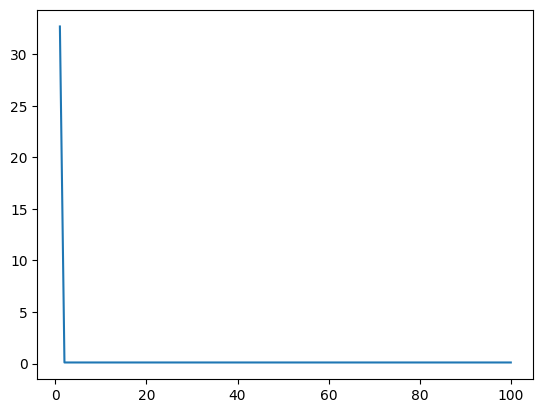

In [3]:
import cify as ci
from cify.si.pso.algorithm import BinaryPSO
import matplotlib.pyplot as plt

obj_func = ci.get_objective_function('mean-dimensions')
pso = BinaryPSO(obj_func=obj_func, swarms=[ci.get_swarm(obj_func=obj_func)])

pso.execute(100)
plt.plot(pso.statistics['global_optimum'])
plt.show()

## DE

CIFY: internal seed successfully set to: '0'


100%|██████████| 120/120 [00:04<00:00, 24.95it/s]


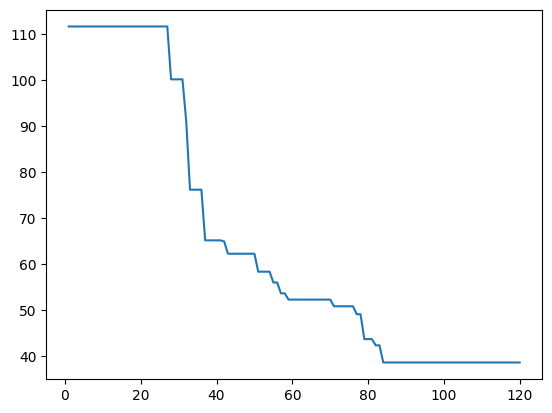

In [1]:
import cify as ci
from cify.ec.de.algorithm import DE
from matplotlib import pyplot as plt

# Set seed.
ci.set_seed(0)

# Define objective function.
obj_func = ci.get_objective_function('rosenbrock')

# Create swarm and algorithm.
population = ci.get_population(50, obj_func=obj_func)
de = DE(obj_func, populations=[population])
de.iterate(120)
plt.plot(de.statistics['global_optimum'])
plt.show()

In [19]:
import cify as ci

p1 = ci.Individual(['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a'])
p2 = ci.Individual(['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'])
p3 = ci.Individual(['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c'])
p4 = ci.Individual(['d', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd'])
pop = ci.Collection([p1, p2, p3, p4])


# offspring = ci.operators.uniform_crossover(pop, 4, 4, replace=False)
offspring = ci.operators.npoint_crossover([p1, p2, p3], 2, 6)
print(offspring[0])
print(offspring[1])


[2, 4, 6, 3, 1, 5]
chromosome: ['a' 'b' 'c' 'a' 'b' 'c' 'a' 'a' 'a' 'a'] -- value --> None
p_best_chromosome: ['a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'] -- value --> Noneobj_func: None

chromosome: ['b' 'c' 'a' 'b' 'c' 'a' 'b' 'b' 'b' 'b'] -- value --> None
p_best_chromosome: ['a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a'] -- value --> Noneobj_func: None



### Basic PSO Example

CIFY: internal seed successfully set to: '0'


100%|██████████| 100/100 [00:17<00:00,  5.78it/s]


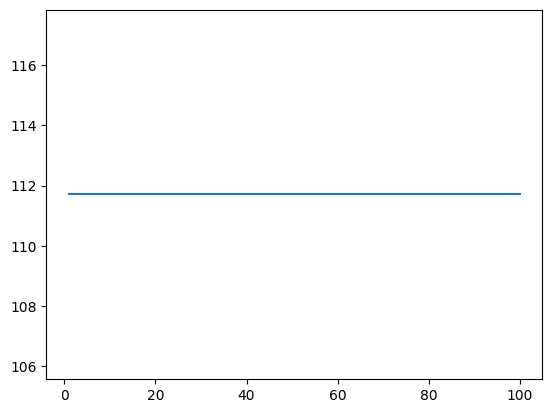

In [1]:
import cify
from cify.si.pso.algorithm import InertiaWeightPSO, NichePSO
from matplotlib import pyplot as plt

# Set seed.
cify.set_seed(0)

# Define objective function.
obj_func = cify.get_objective_function('rosenbrock', cify.Optimization.Min, 10)

# Create swarm and algorithm.
swarm = cify.get_swarm(10, obj_func=obj_func)
swarm2 = cify.get_swarm(10, obj_func=obj_func)
swarm3 = cify.get_swarm(10, obj_func=obj_func)
# pso = InertiaWeightPSO(obj_func, swarms=[swarm], velocity_params={'w':0.72, 'c1':1.4, 'c2':1.4})
pso = NichePSO(obj_func, swarms=[swarm, swarm2, swarm3], velocity_params={'w':0.72, 'c1':1.4, 'c2':1.4})
pso.execute(100)
plt.plot(pso.statistics['global_optimum'])
plt.show()

# Create execution task.
# task = cify.Task(pso, obj_func, n_iterations=100, log=False)
# task.execute()


### Testing EA and GA

CIFY: internal seed successfully set to: '18293'


100%|██████████| 100/100 [00:07<00:00, 14.22it/s]


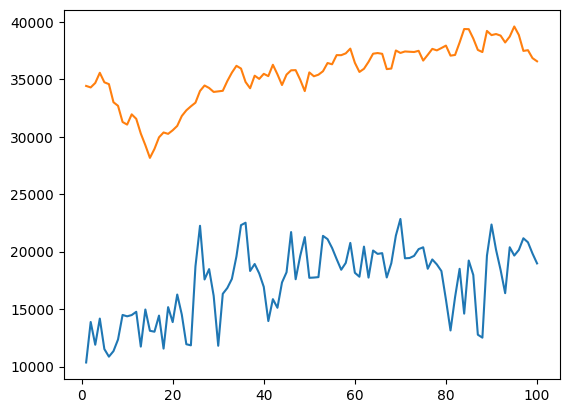

In [3]:
import cify as ci
from cify.ec.ea.algorithm import EA
from cify.ec.ga.algorithm import GA, HollandsCanonicalGA
from matplotlib import pyplot as plt

ci.set_seed(18293)

obj_func = ci.get_objective_function('schwefel', ci.Optimization.Min, 10)

# def evaluate(vector):
#     misses = 0
#     for character in vector:
#         if character != 'a':
#             misses += 1
#     return misses
# obj_func = ci.ObjectiveFunction(function=evaluate, n_dimensions=4)
# population = ci.Collection([
#     ci.Individual(['a', 'b', 'c', 'd'], obj_func=obj_func),
#     ci.Individual(['b', 'a', 'c', 'd'], obj_func=obj_func),
#     ci.Individual(['a', 'b', 'a', 'd'], obj_func=obj_func),
#     ci.Individual(['b', 'a', 'd', 'a'], obj_func=obj_func),
# ])
populations = ci.get_populations(3, obj_func=obj_func)

# ea = EA(obj_func, [ci.get_population(3, obj_func.n_dimensions, obj_func)])
# ea = EA(obj_func, populations,
#         crossover_operator=ci.operators.hillclimbing_crossover,
#         crossover_params={'crossover_probability': 0.9,
#                           'max_attempts': 10},
#         selection_operator=ci.operators.tournament_selection,
#         selection_params={'t_size': 25})

# ga = GA(obj_func, [ci.get_population(120, obj_func=obj_func)],
#         crossover_operator=ci.operators.linear_crossover,
#         selection_operator=ci.operators.proportional_selection,
#         selection_params={'replace': True},
#         # selection_params={'t_size': 30},
#         mutation_params={'mutation_range': 1000.0})

ga = HollandsCanonicalGA(obj_func, [ci.get_population(120, obj_func=obj_func)])

ga.iterate(100, log=False)
plt.plot(ga.statistics['best'])
plt.plot(ga.statistics['mean'])
plt.show()


### Testing Task and Runner

In [1]:
import cify
from cify.si.pso.algorithm import InertiaWeightPSO
from cify.ec.ea.algorithm import EA

# Set seed.
cify.set_seed(0)

# 1. Define objective functions.
obj_func = cify.get_objective_function('rosenbrock', cify.Optimization.Min, 10)
obj_func2 = cify.get_objective_function('schwefel', cify.Optimization.Min, 10)
# obj_func3 = cify.get_objective_function('qing', cify.Optimization.Min, 10)

# 2. Define Collections.
swarm = cify.get_swarm(10, obj_func=obj_func)
swarm.append(cify.Particle(position=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.], name='frank', accent='french', obj_func=obj_func))
populations = cify.get_populations(2, 100, obj_func=obj_func)

# 3. Define Algorithms
ea1 = EA(obj_func, [cify.get_population(100, obj_func.n_dimensions, obj_func)], name='evo1')
ea2 = EA(obj_func, [cify.get_population(10, obj_func.n_dimensions, obj_func)], name='ea2')
pso = InertiaWeightPSO(obj_func, swarms=[swarm], w=0.72, c1=1.4, c2=1.4)

# Creating Runner and adding to pools.
runner = cify.Runner()
runner.add(pso)
# runner.add(ea1)
# runner.add(ea2)
runner.add(obj_func)
runner.add(obj_func2)
# runner.add(obj_func3)
runner.compile(n_independent_runs=5, n_iterations=100, relationship='one-to-many')
print(runner.summary())

CIFY: internal seed successfully set to: '0'
                          Runner Summary (4918376096)                         
Algorithm                          ObjectiveFunction                  Type      
--------------------------------------------------------------------------------
1    InertiaWeightPSO              rosenbrock                         Minimizing
2    InertiaWeightPSO              rosenbrock                         Minimizing
3    InertiaWeightPSO              rosenbrock                         Minimizing
4    InertiaWeightPSO              rosenbrock                         Minimizing
5    InertiaWeightPSO              rosenbrock                         Minimizing
6    InertiaWeightPSO              schwefel                           Minimizing
7    InertiaWeightPSO              schwefel                           Minimizing
8    InertiaWeightPSO              schwefel                           Minimizing
9    InertiaWeightPSO              schwefel                       

### Using Utility Functions

In [2]:
# Define obj_func, swarms, and algorithm to solve obj_func using swarms.
# rng = cify.rng()
# obj_func = cify.get_objective_function("rosenbrock", n_dimensions=30)
# swarm = cify.get_swarm(n_particles=30, obj_func=obj_func, rng=rng)
# n_iterations = 500
#
#
# def local_best_pso():
#     return InertiaWeightPSO(
#         obj_func=obj_func,
#         swarms=swarm,
#         topology=ring_topology,
#         w=0.72, c1=1.4, c2=1.4, n_size=3,
#         rng=rng
#     )
#
#
# def inertia_pso_basic():
#     swarm2 = cify.get_swarm(n_particles=10, obj_func=obj_func, rng=rng)
#     return InertiaWeightPSO(obj_func=obj_func, swarms=[swarm, swarm2], w=0.72, c1=1.4, c2=1.4, rng=rng)
#
#
# def differential_evolution():
#     population = cify.get_population(n_individuals=30, obj_func=obj_func, rng=rng)
#     return DE(obj_func=obj_func, population=population, rng=rng)
